# NUISANCE2

NUISANCE2 contains a wealth of published measurements. These will eventually be converted to HepData format and uploaded for preservation, but as a stopgap we supply a NUISANCE2 interface. This interface will not work seamlessly for every sample in NUISANCE2, some are snowflakes. If you find a sample that doesn't work, please get in touch and we can try to prioritise it's translation to the HepData-native format.

The interface is not designed to be fast, fully functional, or ergnomic, its just designed to give some access to NUISANCE2 Measurements in NUISANCE3. We only need a single `IRecord` instance corresponding to NUISANCE2, samples are then generated as `Table`s.

In [5]:
import pyNUISANCE as pn
rfact = pn.RecordFactory()
rec = rfact.make({"type": "nuisance2"})

In [6]:
tbl = rec.table("T2K_CC1pip_CH_XSec_1Dppi_nu")

[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: T2K_CC1pip_CH_XSec_1Dppi_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/MomentumPion.root;Momentum_pion
[LOG Sample]:--  : Measurement1D.cxx::SetCovarFromRootFile[l. 302] : Reading covariance from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/MomentumPion.root;Momentum_pionCov
StatUtils.cxx::GetDecomp[l. 1081] : [LOG Sample]:--  : Measurement1D.cxx::FinaliseMeasurement[l. 562] : Finalising Measurement: T2K_CC1pip_CH_XSec_1Dppi_nu


[ERR WARN  ]: Cannot decompose the covariance matrix


In [7]:
evs = pn.EventSource("nuwro.t2k.event1.root")
if not evs:
    print("Error: failed to open input file")

In [8]:
fg = pn.FrameGen(evs,10000).limit(1E6)

fg.add_double_columns(["ppi"], tbl.project)

print(fg.first())

 --------------------------
 | evt# | cvw |       ppi |
 --------------------------
 |    0 |   1 | 3.736e+09 |
 |    1 |   1 | 3.736e+09 |
 |    2 |   1 | 3.736e+09 |
 |    3 |   1 | 3.736e+09 |
 |    4 |   1 | 3.736e+09 |
 |    5 |   1 | 3.736e+09 |
 |    6 |   1 | 3.736e+09 |
 |    7 |   1 | 3.736e+09 |
 |    8 |   1 | 3.736e+09 |
 |    9 |   1 | 3.736e+09 |
 |   10 |   1 | 3.736e+09 |
 |   11 |   1 | 3.736e+09 |
 |   12 |   1 | 3.736e+09 |
 |   13 |   1 | 3.736e+09 |
 |   14 |   1 | 3.736e+09 |
 |   15 |   1 | 3.736e+09 |
 |   16 |   1 | 3.736e+09 |
 |   17 |   1 | 3.736e+09 |
 |   18 |   1 | 3.736e+09 |
 |   19 |   1 | 3.736e+09 |
 |   20 |   1 | 3.736e+09 |
 |  ... | ... |       ... |
 --------------------------


If we do filter things, then it is easier to check that things look sensible

In [9]:
fg.filter(tbl.select)
nf = fg.first()
print(nf)

 -----------------------
 | evt# | cvw |    ppi |
 -----------------------
 |   54 |   1 | 0.2342 |
 |   72 |   1 | 0.5572 |
 |   73 |   1 | 0.5574 |
 |   96 |   1 |  2.419 |
 |  131 |   1 | 0.2801 |
 |  133 |   1 |  3.351 |
 |  170 |   1 | 0.2343 |
 |  182 |   1 | 0.2694 |
 |  188 |   1 | 0.3452 |
 |  243 |   1 |   0.32 |
 |  246 |   1 |  0.352 |
 |  274 |   1 | 0.3358 |
 |  289 |   1 | 0.2806 |
 |  361 |   1 | 0.4266 |
 |  365 |   1 | 0.3288 |
 |  379 |   1 |  1.073 |
 |  390 |   1 | 0.3149 |
 |  423 |   1 |  1.299 |
 |  429 |   1 |    0.4 |
 |  448 |   1 |  0.467 |
 |  449 |   1 | 0.1787 |
 |  ... | ... |    ... |
 -----------------------


We get a HistFrame with the correct binning. N.B. that if the measurement in NUISANCE uses a global bin number and a special projection operator, this may not look as expected. For 1D and 2D measurments, it should be normal.

In [11]:
myhist = tbl.blueprint.mc
myhist.reset()

nf = fg.first()
while nf.rows() > 0:
    print("Processing %s rows" % nf.rows())
    for i in range(nf.rows()):
        myhist.fill(nf.table[i][2],nf.table[i][1])
    nf = fg.next()
print(myhist)

Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 10000 rows
Processing 5261 rows
 ---------------------------
 | bin |        mc |   err |
 ---------------------------
 |   0 | 1.006e+04 | 100.3 |
 |   1 | 1.871e+04 | 136.8 |
 |   2 | 1.537e+04 |   124 |
 |   3 |      8680 | 93.17 |
 |   4 |      4917 | 70.12 |
 |   5 |      3039 | 55.13 |
 |   6 |      2182 | 46.71 |
 |   7 |      1599 | 39.99 |
 |   8 |      1278 | 35.75 |
 |   9 |      1048 | 32.37 |
 |  10 |       946 | 30.76 |
 |  11 |       753 | 27.44 |
 |  12 |       661 | 25.71 |
 |  13 |      1018 | 31.91 |
 |  14 |      1341 | 36.62 |
 |  15 |      2096 | 45.78 |
 |  16 |      1566 | 39.57 |
 ---------------------------


In [12]:
#make a differential xs prediction by dividing out the bin widths
mypred = myhist.finalise(True)

#and normalizing by the flux-averaged total cross section and convert fatx units from nb/atom to cm^2/A
mypred.values = mypred.values * (nf.fatx()/nf.sumw()) * (1E-36/13.0)
mypred.errors = mypred.errors * (nf.fatx()/nf.sumw()) * (1E-36/13.0)

print(mypred)
print(tbl.blueprint.data)

 -------------------------------
 | bin |        mc |       err |
 -------------------------------
 |   0 | 4.077e-40 | 4.066e-42 |
 |   1 | 1.517e-39 | 1.109e-41 |
 |   2 | 1.246e-39 | 1.005e-41 |
 |   3 | 7.038e-40 | 7.554e-42 |
 |   4 | 3.987e-40 | 5.685e-42 |
 |   5 | 2.464e-40 |  4.47e-42 |
 |   6 | 1.769e-40 | 3.787e-42 |
 |   7 | 1.296e-40 | 3.242e-42 |
 |   8 | 1.036e-40 | 2.898e-42 |
 |   9 | 8.497e-41 | 2.625e-42 |
 |  10 |  7.67e-41 | 2.494e-42 |
 |  11 | 6.105e-41 | 2.225e-42 |
 |  12 | 5.359e-41 | 2.085e-42 |
 |  13 | 4.127e-41 | 1.293e-42 |
 |  14 | 2.718e-41 | 7.423e-43 |
 |  15 | 1.699e-41 | 3.712e-43 |
 |  16 | 1.058e-42 | 2.674e-44 |
 -------------------------------
 ----------------------------------
 | bin | T2K_CC1pip_$ |       err |
 ----------------------------------
 |   0 |    3.215e-40 | 1.604e-40 |
 |   1 |    1.133e-39 | 3.312e-40 |
 |   2 |    9.786e-40 | 1.951e-40 |
 |   3 |    5.516e-40 |  1.21e-40 |
 |   4 |    3.289e-40 | 8.592e-41 |
 |   5 |    1.818e-

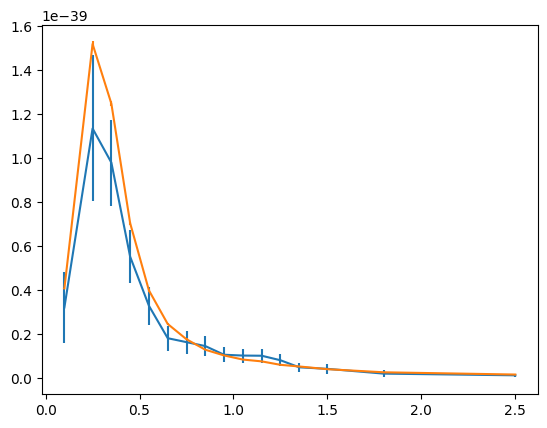

In [13]:
import matplotlib.pyplot as plt
import numpy as np

# cutoff the trash bin at the top
plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins)[:-1],
             tbl.blueprint.data.values[:-1,0],yerr=tbl.blueprint.data.errors[:-1,0])
plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins)[:-1],
             mypred.values[:-1,0],yerr=mypred.errors[:-1,0])
plt.show()

# Lots of projections

In [20]:

tables = []

measurements = [
  (["1pi_thpi",],"T2K_CC1pip_CH_XSec_1Dthpi_nu"),
  (["1pi_thmupi",],"T2K_CC1pip_CH_XSec_1Dthmupi_nu"),
  (["1pi_Q2",],"T2K_CC1pip_CH_XSec_1DQ2_nu"),
  (["1pi_adlerphi",],"T2K_CC1pip_CH_XSec_1DAdlerPhi_nu"),
  (["1pi_cosadlertheta",],"T2K_CC1pip_CH_XSec_1DCosThAdler_nu"),
  (["0pi_dpt",],"T2K_CC0pinp_STV_XSec_1Ddpt_nu"),
  (["0pi_dphit",],"T2K_CC0pinp_STV_XSec_1Ddphit_nu"),
  (["0pi_dat",],"T2K_CC0pinp_STV_XSec_1Ddat_nu"),
]

for ptag, mname in measurements:
  tables.append((ptag, mname, rec.table(mname)))

[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: T2K_CC1pip_CH_XSec_1Dthpi_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/Thetapion.root;Theta_pion
[LOG Sample]:--  : Measurement1D.cxx::SetCovarFromRootFile[l. 302] : Reading covariance from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/Thetapion.root;Theta_pionCov
[LOG Sample]:--  : Measurement1D.cxx::FinaliseMeasurement[l. 562] : Finalising Measurement: T2K_CC1pip_CH_XSec_1Dthpi_nu
[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: T2K_CC1pip_CH_XSec_1Dthmupi_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/Thetapimu.root;Theta(pi,mu)(rads)
[LOG Sample]:--  : Measurement1D.cxx

[ERR WARN  ]: Cannot decompose the covariance matrix
[ERR WARN  ]: Cannot decompose the covariance matrix
[ERR WARN  ]: Cannot decompose the covariance matrix
[ERR WARN  ]: Cannot decompose the covariance matrix


  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: T2K_CC1pip_CH_XSec_1DCosThAdler_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/theta_adler.root;Theta_Adler
[LOG Sample]:--  : Measurement1D.cxx::SetCovarFromRootFile[l. 302] : Reading covariance from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data/T2K/CC1pip/CH/theta_adler.root;Theta_AdlerCov
StatUtils.cxx::GetDecomp[l. 1081] : [LOG Sample]:--  : Measurement1D.cxx::FinaliseMeasurement[l. 562] : Finalising Measurement: T2K_CC1pip_CH_XSec_1DCosThAdler_nu
[LOG Sample]:--  : Measurement1D.cxx::FinaliseSampleSettings[l. 151] : Finalising Sample Settings: T2K_CC0pinp_STV_XSec_1Ddpt_nu
[LOG Sample]:--  : Measurement1D.cxx::SetDataFromRootFile[l. 213] : Reading data from root file: /root/software/NUISANCEMC/nuisance/build/Linux/data//T2K/CC0pi/STV/dptResults.root;Result;
[LOG Sa

Now that we have loaded all of the `MeasurementBase` instances that we want to use, we can set up a FrameGen to produce them. We can filter based on the union of selection functions (in this example, they are all the same), but we don't have to. The `NUISANCE2Record` plugin will check if an event passes selection before calling the NUISANCE2 projection function, and if it does not pass, it will return a vector of missing datum flags.

In [23]:
fg = pn.FrameGen(evs,100000).limit(1E6)

for ptag, mname, tbl in tables:
    fg.add_int_column("%s_sel" % mname, tbl.select)
    fg.add_double_columns(ptag, tbl.project)

print(fg.first())

 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 | evt# | cvw | T2K_CC1pip_$ |  1pi_thpi | T2K_CC1pip_$ | 1pi_thmupi | T2K_CC1pip_$ |    1pi_Q2 | T2K_CC1pip_$ | 1pi_adlerphi | T2K_CC1pip_$ | 1pi_cosadle$ | T2K_CC0pinp$ |   0pi_dpt | T2K_CC0pinp$ | 0pi_dphit | T2K_CC0pinp$ |   0pi_dat |
 ---------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
 |    0 |   1 |            0 | 3.736e+09 |            0 |  3.736e+09 |            0 | 3.736e+09 |            0 |    3.736e+09 |            0 |    3.736e+09 |            0 | 3.736e+09 |            0 | 3.736e+09 |            0 | 3.736e+09 |
 |    1 |   1 |            0 | 3.736e+09 |  

In [24]:
for _, _, tbl in tables:
    tbl.blueprint.mc.reset()

nf = fg.first()
while nf.rows() > 0:
    print("Processing %s rows" % nf.rows())
    for i in range(nf.rows()):
        nprojsused = 0
        for (projs,_, tbl) in tables:
            # allows us to use 1D or 2D samples, but most NUISANCE 2D samples are 
            # implemented manually in 1D global bin number, which makes it difficult
            sel_id = 2 + nprojsused
            if(nf.table[i][sel_id] != 0): # was selected
                tbl.blueprint.mc.fill(pn.Vector_double(nf.table[i][sel_id+1:sel_id+1+len(projs)]),nf.table[i][1])
            nprojsused += 1 + len(projs)
    nf = fg.next()

Processing 100000 rows
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos. Compile with CMAKE_BUILD_TYPE=Debug to make this an exception.
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos. Compile with CMAKE_BUILD_TYPE=Debug to make this an exception.
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos. Compile with CMAKE_BUILD_TYPE=Debug to make this an exception.
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos. Compile with CMAKE_BUILD_TYPE=Debug to make this an exception.
Processing 100000 rows
Processing 100000 rows
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos. Compile with CMAKE_BUILD_TYPE=Debug to make this an exception.
[Binning:warning]: [contiguous.binning_function] was passed an abnornmal number = nan. Returning npos

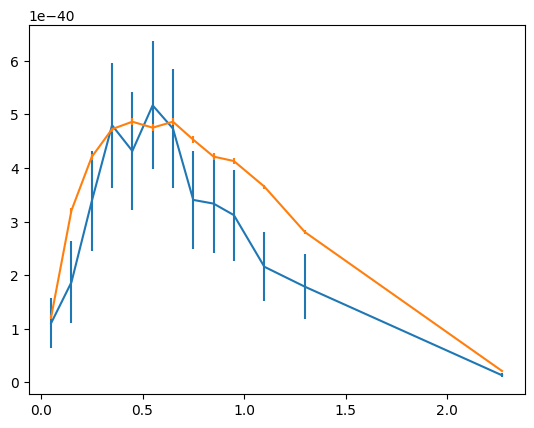

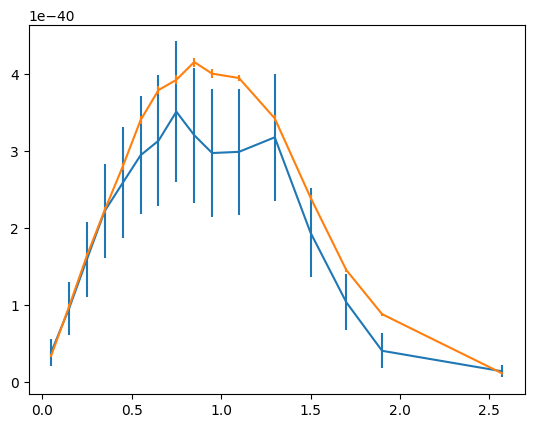

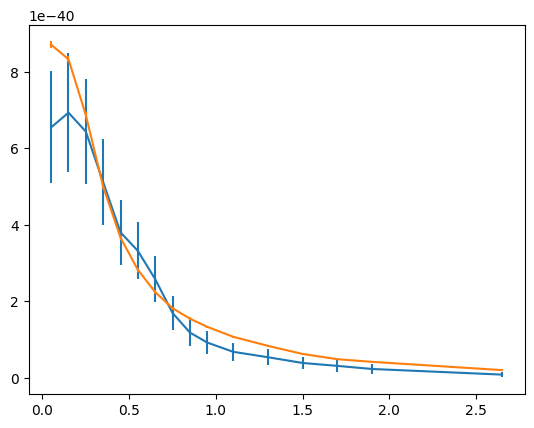

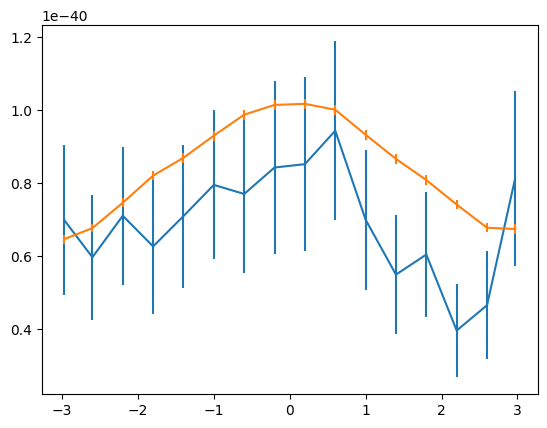

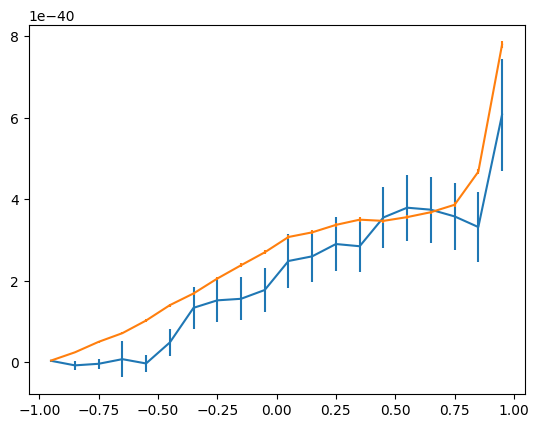

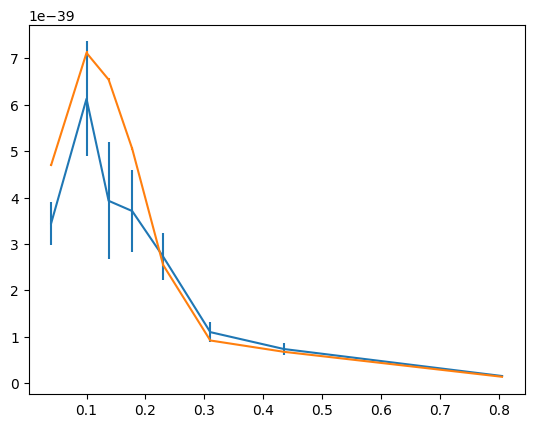

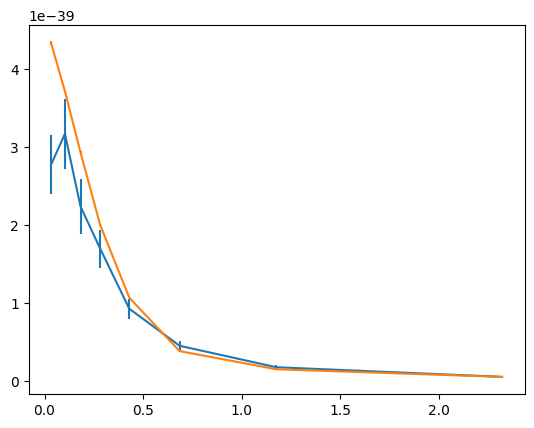

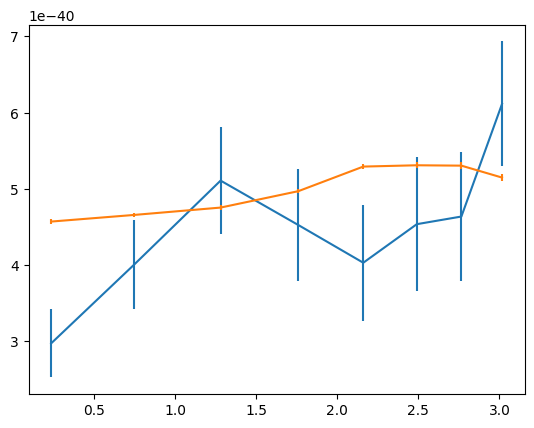

In [25]:
for j,(projs, _, tbl) in enumerate(tables):
    #make a differential xs prediction by dividing out the bin widths
    mypred = tbl.blueprint.mc.finalise(True)

    #and normalizing by the flux-averaged total cross section
    mypred.values = mypred.values * (nf.fatx()/nf.sumw()) * (1E-36/13.0)
    mypred.errors = mypred.errors * (nf.fatx()/nf.sumw()) * (1E-36/13.0)
    
    plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
                 tbl.blueprint.data.values[:,0],yerr=tbl.blueprint.data.errors[:,0])
    plt.errorbar(pn.Binning.get_bin_centers1D(mypred.binning.bins),
                 mypred.values[:,0],yerr=mypred.errors[:,0])
    plt.show()